# Проект: Исследование стартапов

## Введение

Финансовая компания хочет войти на инвестиционный рынок, инвестировать в стартапы. 
### Цель: исследовать исторические данные о покупке и продаже стартапов, учитывая факт, что данные неполные.

## Описание данных

Таблица `acquisition` <br>
Содержит информацию о покупках одними компаниями других компаний:
- id — идентификатор покупки.
- acquiring_company_id — идентификатор покупающей компании.
- acquired_company_id — идентификатор покупаемой компании.
- term_code — варианты расчёта.
- price_amount — сумма сделки.
- acquired_at — дата сделки.


Таблица `company_and_rounds` <br>
Содержит информацию о компаниях и раундах финансирования:
- company ID — идентификатор компании.
- name — название компании.
- category code — категория области деятельности компании.
- status — статус компании.
- founded at — дата инвестирования.
- closed at — дата закрытия компании.
- domain — официальный сайт компании.
- network username — ник компании в сети.
- country code — код страны компании.
- investment rounds — число инвестиционных раундов.
- funding rounds — число раундов финансирования.
- funding total — сумма финансирования.
- milestones — вехи финансирования.
- funding round id — идентификатор этапа финансирования.
- company id — идентификатор компании.
- funded at — дата финансирования.
- funding round type — тип финансирования.
- raised amount — сумма финансирования.
- pre money valuation — предварительная денежная оценка.
- participants — число участников.
- is first round — является ли раунд первым.
- is last round — является раунд последним.


Таблица `education` <br>
Содержит информацию об образовании сотрудника:
- id — идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.

Таблица `people` <br>
Содержит информацию о сотрудниках:
- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.


Таблица `degrees` <br>
Содержит информацию о типе образования сотрудника:
- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.


Таблица `fund` <br>
Содержит информацию о фондах:
- id — идентификатор фонда.
- name — название фонда.
- category_code — категория области деятельности компании.
- founded_at — дата создания фонда.
- domain — сайт фонда.
- network_username — ник фонда в сети.
- country_code — код страны фонда.
- investment_rounds — число инвестиционных раундов.
- invested_companies — число профинансированных компаний.
- milestones — вехи финансирования.


Таблица `investment` <br>
Содержит информацию о раундах инвестирования:
- id — идентификатор этапа инвестирования.
- funding_round_id — идентификатор раунда инвестирования.
- company_id — индентификатор компании.
- funding_round_type — тип финансирования.
- fund_id — идентификатор фонда.

## Cодержание
[1. Знакомство с данными: загрузка и первичная предобработка](#1-bullet)
- [1.1. Вывод общей информации, исправление названия столбцов](#1-bullet)
- [1.2. Смена типов и анализ пропусков](#2-bullet)

[2. Предварительное исследование](#3-bullet)
- [2.1. Раунды финансирования по годам](#3-bullet)
- [2.2. Люди и их образование](#4-bullet)
- [2.3. Можно ли использовать столбцы с именем network_username для объединения данных](#5-bullet)
- [2.4. Проблемный датасет и причина возникновения пропусков](#6-bullet)

[3. Исследовательский анализ объединённых таблиц](#7-bullet)
- [3.1. Объединение данных](#8-bullet)
- [3.2. Анализ выбросов funding_total](#9-bullet)
- [3.3. Исследовать компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.](#10-bullet)
- [3.4. Цены стартапов по категориям](#11-bullet)
- [3.5. Сколько раундов продержится стартап перед покупкой](#12-bullet)

[4. Итоговый вывод и рекомендации](#13-bullet)


<a class="anchor" id="1-bullet"></a>
## Шаг 1. Знакомство с данными: загрузка и первичная предобработка


### 1.1. Вывод общей информации, исправление названия столбцов
* Загрузим все данные по проекту.

* Проверим названия столбцов, и есть ли в датасетах полные дубликаты строк.

* Выведем информацию, которая необходима для принятия решений о предобработке, для каждого из датасетов.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
acquisition=pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds=pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
degrees=pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
education=pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
fund=pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment=pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')
people=pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')

In [3]:
pd.set_option('display.max_columns', 100) #Устанавливаем максимальное выведение столбцов до 100, чтобы при анализе могли видеть все столбцы

In [4]:
acquisition.info()
acquisition.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


В `acquisition` 9407 строк, есть пропуски. Столбец aquired_at необходимо привести к формату даты

In [5]:
company_and_rounds.info()
company_and_rounds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,funding rounds,funding total,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В `company_and_rounds` 217774 строк, есть пропуски. 
- Необходимо привести названия столбцов в snake_case
- столбцы founded at, сlosed at, funded at к формату даты	
- столбцы investment  rounds, funding rounds, milestones,funding round id, company id, participants к целочисленному формату int (после проверки уникальных)
- проверить столбцы is first round, is last round (если единицы и нули, то можно преобразовать в булевый формат или целочисленный, чтобы удобно было анализировать в дальнейшем)

Так же два столбца company ID и company id, данные в которых не совпадают

In [6]:
degrees.info()
degrees.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


В `degrees` 109610 строк, есть пропуски, которые не важны для анализа. Формат данных корректный

In [7]:
education.info()
education.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


В `education` 109610 строк, есть пропуски в столбце graduated_at (вероятно,  из-за того, что люди продолжают обучение). 
- graduated_at преобразовать в формат даты 

In [8]:
people.info()
people.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


В `people` 226709 строк, есть пропуски. 
- company_id преобразовать в int

In [9]:
fund.info()
fund.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11649 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


В `fund` 11652 строк, есть пропуски. 
- founded_at преобразовать в формат даты

In [10]:
investment.info()
investment.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


В `investment` 61403 строк, пропусков нет, данные корректны. 


In [11]:
dfs=[acquisition, company_and_rounds, degrees, education, fund, investment, people]
df_names = ['acquisition', 'company_and_rounds', 'degrees', 'education', 'fund', 'investment', 'people']

for i, df in enumerate(dfs):
    duplicates_count= df.duplicated().sum()
    print (f"В Dataframe {df_names[i]} найдено {duplicates_count} полных явных дубликатов.")

В Dataframe acquisition найдено 0 полных явных дубликатов.
В Dataframe company_and_rounds найдено 0 полных явных дубликатов.
В Dataframe degrees найдено 0 полных явных дубликатов.
В Dataframe education найдено 0 полных явных дубликатов.
В Dataframe fund найдено 0 полных явных дубликатов.
В Dataframe investment найдено 0 полных явных дубликатов.
В Dataframe people найдено 0 полных явных дубликатов.


In [12]:
#Приведем названия столбцов датафрейма company_and_rounds в snake_case, оставив company_ID (первый столбец), company_id (повторяющийся столбец)
company_and_rounds.columns= company_and_rounds.columns.str.replace('  ', ' ').str.replace(' ', '_')
company_and_rounds.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [13]:
for column in ['investment_rounds', 'funding_rounds', 'milestones', 'funding_round_id', 'participants', 'is_first_round', 'is_last_round']:
    print(f"В столбце {column} уникальные значения {company_and_rounds[column].unique()}")

В столбце investment_rounds уникальные значения [  0.   1.   3.  32.   2.   4.   9.  30.  17.   7.   6.   8.  18.   5.
  25.  19.  49.  21.  16.  14.  37.  96.  22.  10.  12. 478.  15.  89.
  11.  24. 297.  20.  29. 125.  33.  40.  38.  68.  13.  44.  58.  51.
  nan]
В столбце funding_rounds уникальные значения [ 3.  0.  1.  5.  2.  7.  4.  6.  8. 10.  9. 13. 11. 15. 14. 12. nan]
В столбце milestones уникальные значения [ 5.  0.  4.  1.  3.  2.  6.  8.  7.  9. nan]
В столбце funding_round_id уникальные значения [  888.   889.  2312. ... 56543. 56928. 57063.]
В столбце participants уникальные значения [ 2.  3.  4. nan  1.  5.  0.  6.  7. 16.  9. 10. 12.  8. 13. 21. 11. 15.
 20. 14. 28. 18. 23. 25. 17. 29. 22. 32. 19. 24. 26. 27. 36.]
В столбце is_first_round уникальные значения [ 0.  1. nan]
В столбце is_last_round уникальные значения [ 1.  0. nan]


Все данные целочисленные, но содержат пропуски, поэтому данные представлены в формате float. 

<a class="anchor" id="2-bullet"></a>
### 1.2. Смена типов и анализ пропусков


Проверим пропуски в абсолютных и относительных количествах во всех датафреймах

In [14]:
for i, df in enumerate(dfs):
    null_count_abs= df.isna().sum()
    share_null= df.isna().sum()/ len(df)*100
    print (f"В Dataframe {df_names[i]} абсолютных пропусков: {null_count_abs} .")
    print (f"В Dataframe {df_names[i]} относительных пропусков: {share_null} .")

В Dataframe acquisition абсолютных пропусков: id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64 .
В Dataframe acquisition относительных пропусков: id                       0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
term_code               80.535771
price_amount             0.000000
acquired_at              0.308281
dtype: float64 .
В Dataframe company_and_rounds абсолютных пропусков: company_ID                302
name                      303
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id            

В `company_and_rounds`:
- по 302 пропуска в company_ID, name, status, investment_rounds, funding_rounds, funding_total, milestones, что составляет 0,14% от всей таблицы, эти данные важны для анализа, поэтому оставим без изменения
- и по 164846 пропусков со столбцов funding_round_id до is_last_round.
Вероятно, этот датафрейм представляет собой объединенные таблицы. 

In [15]:
filt_company_and_rounds = company_and_rounds.loc[pd.isna(company_and_rounds['name'])]
filt_company_and_rounds

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
6492,137018.0,NaN,NaN,closed,2009-01-01,2010-07-01,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,457.0,1267.0,2005-01-01,series-a,48000000.0,0.0,2.0,1.0,1.0
217473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,471.0,558.0,2007-01-01,angel,300000.0,0.0,1.0,1.0,1.0
217474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,575.0,746.0,2004-09-01,angel,0.0,0.0,0.0,1.0,1.0
217475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,577.0,748.0,2007-01-01,series-a,1500000.0,2250000.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0


- В dataframe `degrees` пропуски degree_type    11218 (10%), subject 28312 (25%), не нужны для исследования, их оставим без изменения.
- В dataframe `education` абсолютных пропусков instituition 55, graduated_at 51556. instituition не нужен для анализа, graduated_at вероятно из-за того, что люди продолжали учиться на момент сбора данных, либо были отчислены и не закончили обучение.
- В dataframe `fund` относительных пропусков: name 0.017164, founded_at  60%, domain 36%, network_username 81%, country_code 39%, много пропусков, но при этом эти столбцы не нужны для анализа, оставим без изменения. 
- В dataframe `people` относительных пропусков: first_name 0.002205%, last_name 0.000441%, company_id 84%, network_username 82%, пропуски в незначимых столбцах, оставим без изменения. 

In [16]:
# Преобразуем данные в  столбцах с датами в формат datetime64 
acquisition['acquired_at']=pd.to_datetime(acquisition['acquired_at'])
for column in ['founded_at', 'closed_at', 'funded_at']:
    company_and_rounds[column]= pd.to_datetime(company_and_rounds[column])
education['graduated_at']= pd.to_datetime(education['graduated_at'])
fund['founded_at']= pd.to_datetime(fund['founded_at'])

# Проверим преобразование на company_and_rounds
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

В данных много пропусков, но, в основном, в тех столбцах, которые не важны для анализа.

Исключение датафрейм `company_and_rounds`, который получился путем объединения двух таблиц, следовательно в нем много строк с пропусками.  

<a class="anchor" id="3-bullet"></a>
## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам


In [17]:
#Составляем сводную таблицу по годам 
import numpy as np
company_and_rounds['funded_at_year']= company_and_rounds['funded_at'].dt.year
pivot=pd.pivot_table(
    company_and_rounds,
    index= 'funded_at_year',
    values='raised_amount',
    aggfunc={'raised_amount': [np.median, 'count']}
)

#Фильтруем таблицу, чтобы отразить только те годы, где есть информация о более чем 50 раундах финансирования
filtered_pivot = pivot[pivot['count'] > 50]
filtered_pivot=filtered_pivot.reset_index()
print(filtered_pivot)

    funded_at_year  count     median
0           1999.0     76  2000000.0
1           2000.0    125  4200000.0
2           2001.0     96  3000000.0
3           2002.0    116  4200000.0
4           2003.0    159  3000000.0
5           2004.0    291  5000000.0
6           2005.0   1633  5500000.0
7           2006.0   2436  5000000.0
8           2007.0   3279  3973320.0
9           2008.0   3774  3110000.0
10          2009.0   4151  2000000.0
11          2010.0   6221  1602500.0
12          2011.0   9204  1200000.0
13          2012.0   9970  1000000.0
14          2013.0  11072  1200000.0


C:\Users\eshai\AppData\Local\Temp\ipykernel_11408\3514415985.py:4: FutureWarning: The provided callable <function median at 0x00000214FCE8F240> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  pivot=pd.pivot_table(


<Axes: title={'center': 'Динамика типичного размера средств, которые стартапы получали в рамках одного раунда финансирования'}, xlabel='Год', ylabel='Объем средств в млн'>

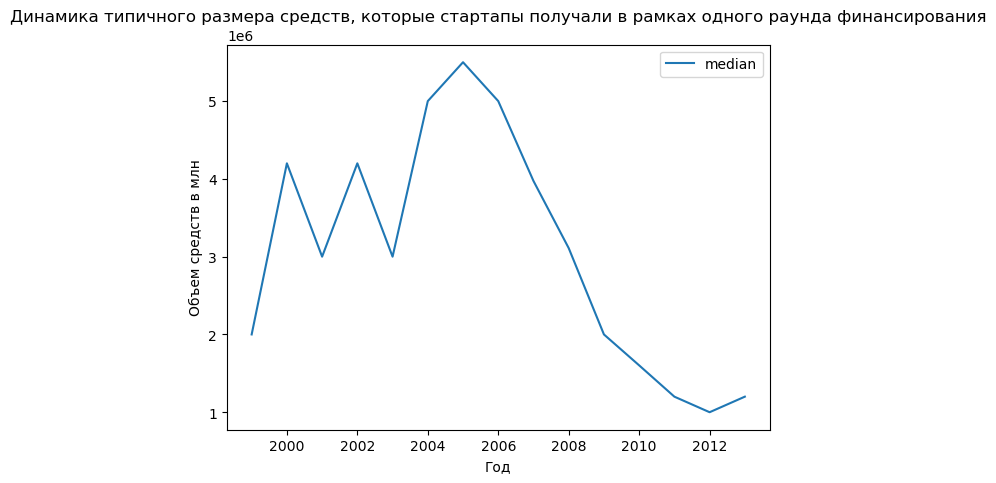

In [18]:
#Строим график

filtered_pivot.plot.line(
    x='funded_at_year',
    y='median',
    title='Динамика типичного размера средств, которые стартапы получали в рамках одного раунда финансирования',
    xlabel='Год',
    ylabel='Объем средств в млн',
    figsize=(7,5)
)

<Axes: title={'center': 'Тенденция количества раундов финансирования за год'}, xlabel='Год', ylabel='Кол-во раундов финансирования'>

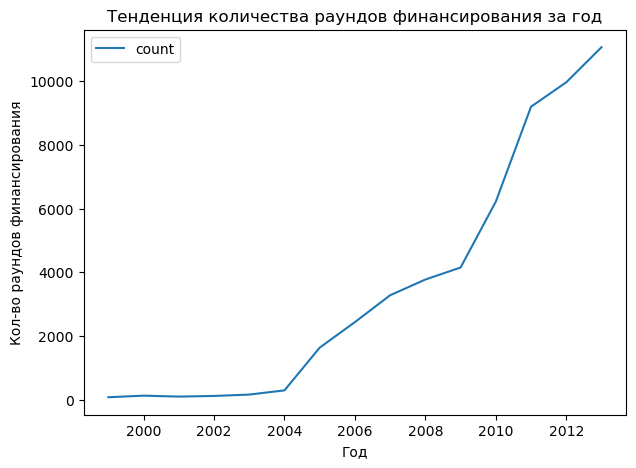

In [19]:
#Строим график

filtered_pivot.plot.line(
    x='funded_at_year',
    y='count',
    title='Тенденция количества раундов финансирования за год',
    xlabel='Год',
    ylabel='Кол-во раундов финансирования',
    figsize=(7,5)
)

В 2005 году типичный размер собранных в рамках одного раунда средств был максимальным - 5500000.0.
Количество раундов финансирования к 2013 году растет, а типичный размер средств в рамках 1 этапа финансирования снижается. 

<a class="anchor" id="4-bullet"></a>
### 2.2. Люди и их образование


In [20]:
#Оценим полноту информации об образовании сотрудников, создав новый столбец с булевыми значениями, если есть значения в одном из столбцов `instituition` или `graduated_at`, вернет True
education['educated'] = education['instituition'].notna() | education['graduated_at'].notna()
education.head()

,id,person_id,instituition,graduated_at,educated
0,1,6117,NaN,NaT,False
1,2,6136,"Washington University, St. Louis",1990-01-01,True
2,3,6136,Boston University,1992-01-01,True
3,4,6005,University of Greenwich,2006-01-01,True
4,5,5832,Rice University,NaT,True


In [21]:
#Вычислим долю для оценки полноты информации об образовании
education['educated'].mean()

np.float64(0.9998266581516285)

Информацию в датафрейме `education` можно оценить как полную

In [22]:
#еще раз выводим информацию о датафреймах
people.info()
education.info()
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
 4   educated      109610 non-null  bool          
dtypes: bool(1), datetime

Учитывая, что строк в датафрейме `people` больше, присоединим к этому датафрейму информацию об образовании с помощью left join. Таблица `degrees` для полноты данных не нужна, т.к. там больше пропусков в столбце degree_type, следовательно данные в `education` полнее. 

In [23]:
people_merged= people.merge(education, left_on = 'id', right_on = 'person_id', how='left')
people_merged

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,educated
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,True
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT,NaN
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01,True
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01,True
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT,NaN


In [24]:
people_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267694 entries, 0 to 267693
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              267694 non-null  int64         
 1   first_name        267685 non-null  object        
 2   last_name         267690 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_y              109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
 9   educated          109056 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 20.4+ MB


In [25]:
#проверим дубликаты после объединения
people.merge(education, left_on = 'id', right_on = 'person_id', how='left').duplicated().sum()

np.int64(0)

In [26]:
people_merged['count_person']=people_merged.groupby('company_id')['id_x'].count()

In [27]:
people_merged.groupby('company_id')['id_x'].count().describe()

count    22922.000000
mean         1.953974
std          4.087373
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        376.000000
Name: id_x, dtype: float64

In [28]:
people_merged['count_person'].value_counts()

count_person
1.0      13531
2.0       4595
3.0       1812
4.0        812
5.0        444
6.0        258
7.0        159
8.0        114
9.0         85
11.0        52
10.0        51
13.0        26
12.0        25
18.0        16
15.0        14
16.0        12
14.0        12
19.0        10
20.0         9
17.0         8
25.0         4
27.0         3
22.0         3
44.0         2
30.0         2
29.0         2
35.0         2
39.0         2
34.0         2
24.0         2
26.0         2
59.0         1
64.0         1
84.0         1
221.0        1
52.0         1
28.0         1
42.0         1
376.0        1
71.0         1
80.0         1
70.0         1
66.0         1
192.0        1
46.0         1
21.0         1
73.0         1
89.0         1
43.0         1
111.0        1
Name: count, dtype: int64

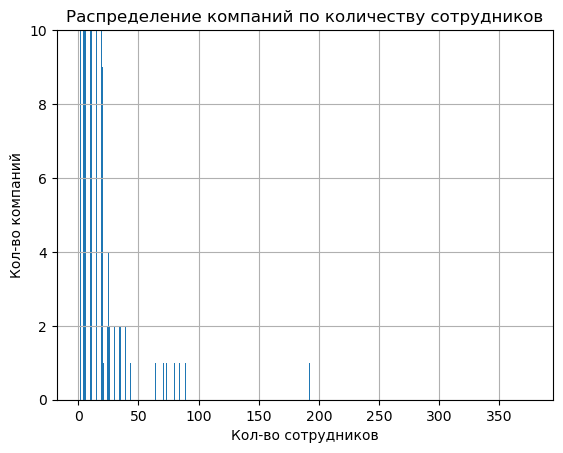

In [29]:
people_merged.groupby('company_id')['id_x'].count().hist(bins=1000)
plt.ylim(0, 10)
plt.xlabel('Кол-во сотрудников')
plt.ylabel('Кол-во компаний')
plt.title('Распределение компаний по количеству сотрудников')
plt.show()

Медианное значение кол-ва человек в компании 1, следовательно выделим следующие категории компаний:
-  1 сотрудник - один сотрудник
- до 2- 10 - малые,
- 11-50 - средние,
- больше 50 - крупные

In [30]:
people_merged['company_size'] = pd.cut(people_merged['count_person'], bins=[0, 1, 10, 50, 377], labels=['Один сотрудник','Малые', 'Средние', 'Крупные'])

In [31]:
people_merged.head()

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,educated,count_person,company_size
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,True,NaN,NaN
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,NaN,3.0,Малые
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,NaN,1.0,Один сотрудник
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,NaN,5.0,Малые
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,18.0,Средние


In [32]:
#Вычислим кол-во пропущенных значений в столбце educated и разделим на количество сотрудников count_person, сгруппировав по размеру компании
print("Средняя доля сотрудников без информации об образовании в каждой из групп")
people_merged.groupby('company_size')['educated'].apply(lambda x: x.isna().sum())/people_merged.groupby('company_size')['count_person'].sum()


Средняя доля сотрудников без информации об образовании в каждой из групп


C:\Users\eshai\AppData\Local\Temp\ipykernel_11408\2112675608.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  people_merged.groupby('company_size')['educated'].apply(lambda x: x.isna().sum())/people_merged.groupby('company_size')['count_person'].sum()


company_size
Один сотрудник    0.616289
Малые             0.212052
Средние           0.036617
Крупные           0.005597
dtype: float64

 Полнота сведений об образовании сотрудников выше в крупных и средних компаниях.

<a class="anchor" id="5-bullet"></a>
### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных. Необходимо проверить, подходит ли cтолбец `network_username` для объединения датасетов.

Применим операцию intersection  для нахождения общих элементов между двумя наборами данных и определим длину множества (т.е. кол-во совпадений)

In [33]:
len(set(company_and_rounds['network_username']).intersection(fund['network_username']))

71

In [34]:
len(set(company_and_rounds['network_username']).intersection(people['network_username']))

2200

In [35]:
len(set(fund['network_username']).intersection(people['network_username']))

80

In [36]:
#Доля совпадений company_and_rounds и fund по network_username
len(set(company_and_rounds['network_username']).intersection(fund['network_username']))/len(set(company_and_rounds['network_username']))

0.0008922736641029508

In [37]:
#Доля совпадений company_and_rounds и people по network_username
len(set(company_and_rounds['network_username']).intersection(people['network_username']))/len(set(company_and_rounds['network_username']))

0.0276479163524858

In [38]:
#Доля совпадений fund и people по network_username
len(set(fund['network_username']).intersection(people['network_username']))/len(set(fund['network_username']))

0.038113387327298714

network_username нельзя использовать для объединения данных, так как пересечения данных в относительных величинах слишком мало.

<a class="anchor" id="6-bullet"></a>
### 2.4. Проблемный датасет и причина возникновения пропусков


При анализе пропусков выше в разделе 1.2. Смена типов и анализ пропусков обнаружено, что в company_and_rounds:
- по 302 пропуска в company_ID, name, status, investment_rounds, funding_rounds, funding_total, milestones, что составляет 0,14% от всей таблицы, эти данные важны для анализа, поэтому оставим без изменения
- и по 164846 пропусков со столбцов funding_round_id до is_last_round.
Вероятно этот датафрейм представляет собой объединенные таблицы. 

In [39]:
company_and_rounds

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0,2011.0
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,2011.0
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0,2012.0
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0,2013.0


In [40]:
#Пересечений по столбцам company_ID и company_id 
len(set(company_and_rounds['company_ID']).intersection(company_and_rounds['company_id']))

31707

In [41]:
#Выделим таблицу с компаниями по столбцам
companies = company_and_rounds.iloc[:, :13]
companies

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#удалим строки с отсутствующими данными в company_ID и полные, явные дубликаты
companies = companies.dropna(subset=['company_ID'])
companies= companies.drop_duplicates()
companies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196553 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         196553 non-null  float64       
 1   name               196552 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memor

In [43]:
#Выделим таблицу с раундами по столбцам
rounds = company_and_rounds.iloc[:, 13:]
rounds

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
217769,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0,2011.0
217770,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,2011.0
217771,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0,2012.0
217772,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0,2013.0


In [44]:
#удалим строки с отсутствующими данными в funding_round_id и полные, явные дубликаты
rounds = rounds.dropna(subset=['funding_round_id'])
rounds= rounds.drop_duplicates()
rounds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52928 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id           52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   funded_at_year       52680 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 4.4+ MB


Получили два отдельных датафрейма companies и rounds. Таким образом, будем удобнее отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

<a class="anchor" id="7-bullet"></a>
## Шаг 3. Исследовательский анализ объединённых таблиц



<a class="anchor" id="8-bullet"></a>
### 3.1. Объединение данных

Нас интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, означает интерес к покупке или продаже компании.

In [45]:
#Отбираем компании по условию
companies=companies.loc[(companies['funding_rounds']>0) | (companies['investment_rounds']>0) | 
                        (companies['status']=='acquired')]

In [46]:
# Объединяем датафреймы
companies_new=companies.merge(acquisition, left_on='company_ID', right_on='acquired_company_id', how='left')
companies_new.drop_duplicates()
companies_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40890 entries, 0 to 40889
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_ID            40890 non-null  float64       
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  float64       
 10  funding_rounds        40890 non-null  float64       
 11  funding_total         40890 non-null  float64       
 12  milestones            40890 non-null  float64       
 13  id              

In [47]:
companies_new.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaT
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,1.0,11.0,10.0,NaN,20000000.0,2007-05-30
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,20.0,377.0,100.0,cash,0.0,2005-05-29
3,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0,1901.0,5.0,1001.0,cash_and_stock,47500000.0,2009-08-10
4,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0,3878.0,23054.0,10014.0,NaN,0.0,2010-09-30


<a class="anchor" id="9-bullet"></a>
### 3.2. Анализ выбросов


- По предобработанному столбцу `funding_total` графическим способом оценим, какой размер общего финансирования для одной компании будет типичным, а какой выбивающимся.

In [48]:
companies_new['funding_total'].describe()

count    4.089000e+04
mean     1.013559e+07
std      5.641289e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.631320e+06
max      5.700000e+09
Name: funding_total, dtype: float64

In [49]:
#Чтобы экспоненциальную запись цифр приведем к млн, разделив на 1000000
companies_new['funding_total_mln']=companies_new['funding_total']/1000000

In [50]:
companies_new['funding_total_mln'].describe()

count    40890.000000
mean        10.135586
std         56.412887
min          0.000000
25%          0.000000
50%          0.600000
75%          5.631320
max       5700.000000
Name: funding_total_mln, dtype: float64

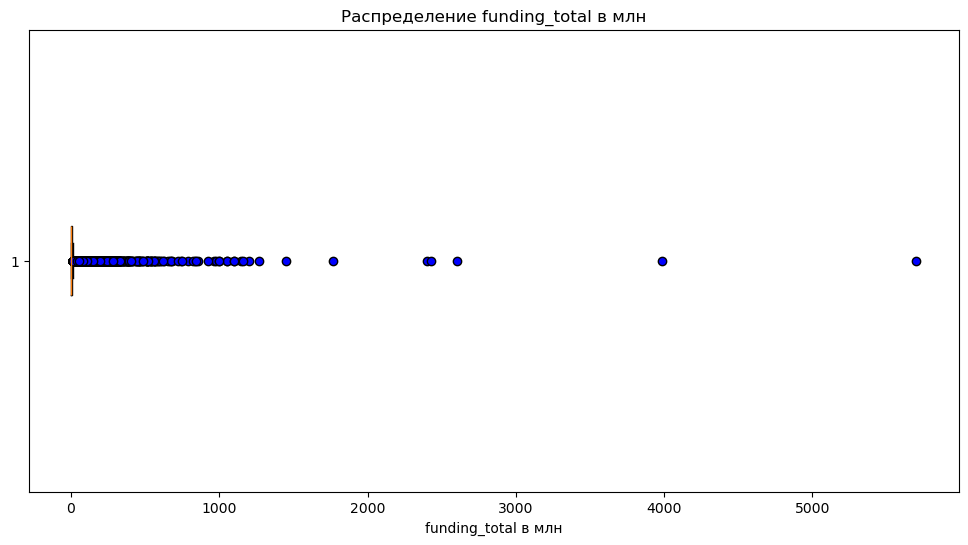

In [51]:
plt.figure(figsize=(12,6))
plt.boxplot(companies_new['funding_total_mln'],
            vert=False,
            flierprops=dict(markerfacecolor='blue',
            marker='o'))
plt.title('Распределение funding_total в млн')
plt.xlabel('funding_total в млн')
plt.show()

Учитывая большие выбросы данных, медиана(0,6) и среднее (10.14) сильно различаются - стандартное отклонение 56.41.
Уберем выбросы на графике, чтобы оценить границы межквартильного интервала.

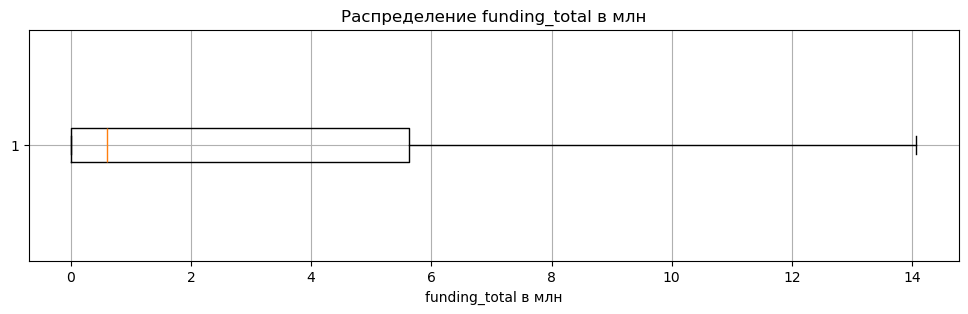

In [52]:
plt.figure(figsize=(12,3))
plt.boxplot(companies_new['funding_total_mln'],
            vert=False,
            showfliers=False
            )
plt.title('Распределение funding_total в млн')
plt.xlabel('funding_total в млн')
plt.grid(True)
plt.show()

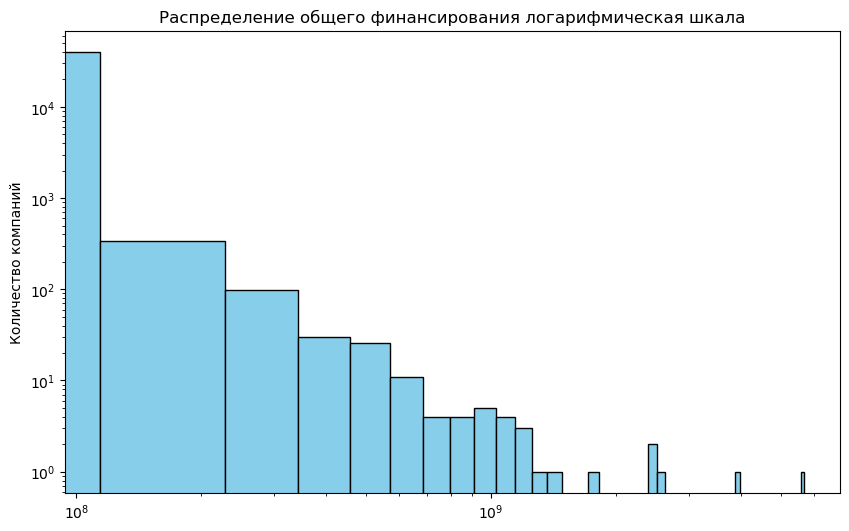

In [53]:
plt.figure(figsize=(10, 6)) 
plt.hist(companies_new['funding_total'], bins=50, color='skyblue', edgecolor='black', log=True) 
plt.xscale('log') # Логарифмическая шкала по оси X plt.xlabel('Общее финансирование (логарифмическая шкала)') 
plt.ylabel('Количество компаний') 
plt.title('Распределение общего финансирования логарифмическая шкала') 
plt.show()

Финансирование от 0 до 5.63 млн - типичное, наиболее часто встречающийся объем финансирования - 0,6 млн(медианное значение). Более 14 млн - выбивающиеся значения (выбросы). 

<a class="anchor" id="10-bullet"></a>
### 3.3. Куплены забесплатно?

- Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.


In [54]:
#Фильтруем компании которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования
companies_zero=companies_new[((companies_new['price_amount']==0)|(companies_new['price_amount']==1))&(companies_new['funding_total']>0)]

In [55]:
q1=companies_zero['funding_total_mln'].quantile(0.25)
q3 = companies_zero['funding_total_mln'].quantile(0.75)
iqr=q3-q1
print(f"Нижняя граница выбросов {q1 - 1.5 * iqr}") 
print(f"Верхняя граница выбросов {q3 + 1.5 * iqr}")

Нижняя граница выбросов -18.25
Верхняя граница выбросов 35.75


In [56]:
companies_zero['funding_total_mln'].describe()

count    1618.000000
mean       18.152962
std       144.503027
min         0.003750
25%         2.000000
50%         6.000000
75%        15.500000
max      5700.000000
Name: funding_total_mln, dtype: float64

In [57]:
#Определим каком перцентилю соответсвует верхняя граница
(companies_zero[companies_zero['funding_total_mln'] < 35.75]['funding_total_mln'].count()/companies_zero['funding_total_mln'].count()).round(decimals=2)

np.float64(0.91)

Учитывая, что финансирование не может быть отрицательным, нижняя граница выбросов - 0(0 перцентиль), верхняя граница выбросов 35.75 млн (более 0.91 перцентиля). 

<a class="anchor" id="11-bullet"></a>
### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим те, которые характеризуются:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.


In [58]:
#Добавим столбец price_amount_mln (в миллионах)
companies_new['price_amount_mln'] = companies_new['price_amount'] / 1000000


In [59]:
#Фильтруем стартапы которые были куплены не номинально (не за ноль и не за один доллар)
companies_high_price=companies_new[(companies_new['price_amount']>1)]

In [60]:
companies_high_price['price_amount_mln'].describe().to_frame().style.format("{:.2f}")


,price_amount_mln
count,2470.00
mean,1497.79
std,52336.13
min,0.00
25%,12.93
50%,56.45
75%,265.00
max,2600000.00


In [61]:
#рассчитаем среднее, медиану и стандартное отклонение, чтобы определить стартапы с типично высокими ценами и значительным разбросом цен.
#стандартное отклонение будет показывать разброс цен, так как является мерой степени изменчивости значений переменной относительно её среднего
high_price_rating= companies_high_price.groupby('category_code').agg({
    'price_amount_mln': ['mean', 'std', 'median']
}).reset_index()

# Переименовываем столбцы для более точного обращения
high_price_rating.columns = ['category_code', 'mean', 'std', 'median']

high_price_rating.sort_values(by=['median', 'std'], ascending=False).reset_index()
 

,index,category_code,mean,std,median
0,2,automotive,2547.666667,2581.669292,2400.0000
1,33,sports,622.500000,512.652416,622.5000
2,21,nanotech,584.000000,NaN,584.0000
3,27,real_estate,1465.500000,2676.302206,400.0000
4,16,manufacturing,813.757161,1060.434506,351.0000
5,34,transportation,450.000000,572.625532,230.0000
6,3,biotech,735.915255,1968.195264,200.0000
7,1,analytics,181.000000,92.967736,200.0000
8,9,fashion,187.500000,86.494219,195.0000
9,4,cleantech,482.316154,874.419628,185.0000


In [62]:
#Отберем топ5 категорий
high_price_rating.sort_values(by=['median', 'std'], ascending=False).reset_index().head(5)

,index,category_code,mean,std,median
0,2,automotive,2547.666667,2581.669292,2400.0
1,33,sports,622.500000,512.652416,622.5
2,21,nanotech,584.000000,NaN,584.0
3,27,real_estate,1465.500000,2676.302206,400.0
4,16,manufacturing,813.757161,1060.434506,351.0


- Поскольку некоторые стартапы куплены номинально(за 0 или 1 рубль) мы отобрали те, что были проданы дороже. Затем рассчитали статистические показатели для столбца price_amount_mln (для наглядности преобразовали данные price_amount в млн 10^6), 75% процентиль равен 265.00, этот показатель будем использовать для отбора топ5 категорий. 

- Учитывая высокий разброс показателей, используем медиану для определения стартапов с типично высокими ценами
- Стандартное отклонение будет показывать разброс цен, так как является мерой степени изменчивости значений переменной относительно её среднего
- Топ 5 категорий automotive, sports, nanotech, real_estate, manufacturing

<a class="anchor" id="12-bullet"></a>
### 3.5. Сколько раундов продержится стартап перед покупкой

Исследуем значения столбца `funding_rounds`.

In [63]:
#Фильтруем стартапы, где количество раундов больше 0
companies_rounds_count=companies_new[(companies_new['funding_rounds']>0)]

In [64]:
rounds_before_sell= companies_rounds_count.groupby('status').agg({
    'funding_rounds': ['mean', 'std', 'median', 'min', 'max']
}).reset_index()

rounds_before_sell

status funding_rounds                            
                       mean       std median  min   max
0   acquired       1.897766  1.279263    1.0  1.0  12.0
1     closed       1.383437  0.834444    1.0  1.0   8.0
2        ipo       2.526531  2.219156    2.0  1.0  13.0
3  operating       1.642359  1.180895    1.0  1.0  15.0

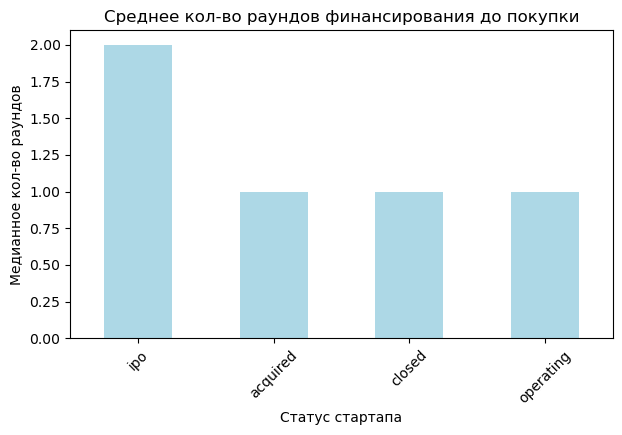

In [65]:
plt.figure(figsize=(7, 4))

companies_rounds_count.groupby('status')['funding_rounds'].median().sort_values(ascending=False).plot(
    kind='bar',
    rot=45,
    title='Cреднее кол-во раундов финансирования до покупки',
    color='lightblue'
)


plt.ylabel('Медианное кол-во раундов')
plt.xlabel('Статус стартапа')
# Выводим график
plt.show()

Те стартапы, которые получили статус ipo  в среднем прошли больше раундов финансирования, чем стартапы с другими статусами - медианное значение 2 этапа, стартапы с другими статусами по 1 этапу. 

<a class="anchor" id="13-bullet"></a>
## Шаг 4. Итоговый вывод и рекомендации



### Итоговый вывод <br>
1. В результате предобработки данных было выяснено, что в данных много пропусков, но, в основном, в тех столбцах, которые не важны для анализа. Исключение датафрейм `company_and_rounds`, который получился путем объединения двух таблиц. Датафрейм `company_and_rounds` разделили на 2 датафрейма `companies` и `rounds`, удалили дубликаты в каждом и получили `companies` с 196553 строками, `rounds` с 52928 строк. </br>
Объединили предобработанный датафрейм и присоединили датафрейм `acquisition`, отобрали те компании, в которых указаны значения funding_rounds или investment_rounds больше нуля, или те, у которых в колонке status указано acquired, получился датафрейм `companies`.</br>

2. В 2005 году типичный размер собранных в рамках одного раунда средств был максимальным - 5500000.0. Количество раундов финансирования к 2013 году растет, а типичный размер средств в рамках 1 этапа финансирования снижается.
Это может говорить о взрывном росте активности на рынке стартапов, а также о более широком доступе стартапов к финансированию. Вероятно, на рынок пришли новые инвесторы, мелкие фонды, что дало импульс к увеличению числа сделок при снижении их среднего размера.
3. Информацию в датафрейме education можно оценить как полную. Полнота сведений об образовании сотрудников выше в крупных и средних компаниях.
4. network_username, который встречается в нескольких датафреймах, нельзя использовать для объединения данных, так как пересечения данных в относительных величинах слишком мало.
5. Типичный объем финансирования от 0 до 5.63 млн, наиболее часто встречающийся объем финансирования - 0,6 млн(медианное значение). Более 14 млн - выбивающиеся значения (выбросы). 
6. У компаний, купленных за 0 или 1 доллар , минимальный объем финансирования - нулевой (0 перцентиль), верхняя граница выбросов 35.75 млн (более 0.0.909665 перцентиля).  
7. Топ 5 категорий стартапов, купленных за дорого и с максимальным разбросом цен: automotive, sports, nanotech, real_estate, manufacturing. 
8. Те стартапы, которые получили статус ipo  в среднем прошли больше раундов финансирования, чем стартапы с другими статусами - медианное значение 2 этапа, тартапы с другими статусами по 1 этапу. 

### Рекомендации <br>
- Оценивать разные показатели стартапа, не только объем финансирования, поскольку даже при больших инвестициях стартап может оказаться неэффективным и быть проданным забесплатно.
- Сфокусироваться на множестве небольших инвестиций. Так как есть тенденция снижения объём средств на один раунд и роста количества сделок, стратегия делать много инвестиций с небольшими чеками и диверсифицировать портфель выглядит перспективной.
- Создать модель для оценки перспективности стартапов
- Выбросы до 5,7 млрд среди провальных сделок говорят о переоценке некоторых стартапов в прошлом. Инвестировать стоит только после объективной проверки гипотез и ориентации на модель для оценки перспективности на основе разных показателей стартапов.

